Nama: Alyza Rahima Pramudya <br>NIM: 2502032125

# **Video**

---
Video penjelasan bisa diakses melalui link berikut: https://youtu.be/zZbLkgUwIFY



# **A) Question**

---
Sebagai seorang data scientist di suatu perusahaan media, Anda diminta untuk melakukan proses awal sebelum melakukan teks classification. Tujuan proses awal ini adalah menghasilkan suatu set vektor dari data teks yang sudah dibersihkan dari simbol, hashtag, kata-kata “https”, ataupun “.com”, dimana keseluruhan teks harus lower case dengan size vektor adalah 50, dan frequency kata yang diperhitungkan minimal 3. Vektor yang dihasilkan harus berdasarkan hasil training dengan input kata dan target output conteks dan tanpa mengandung stopwords.

<br>Selain itu anda juga diminta untuk melakukan prediksi awal isi berita dengan menggunakan 2 algoritma machine learning yaitu SVM dan Random Forest dengan menggunakan 2 metode text representation, kemudian jelaskan perbandingan kedua metode terhadap hasil machine learning.


# **B) Data**

---
Pada percobaan kali ini kita akan menggunakan data yang sudah kita kumpulkan terlebih dahulu dari 4 media yang berbeda, yaitu **Kompas, Pikiran rakyat, Tribunnews**, dan **merdeka** untuk 3 kategori label yang berbeda, yaitu **Olahraga, Hiburan, dan Politik**

<br>Proses pengumpulan datanya saya lakukan secara manual dan juga menggunakan googleNews dan newspaper3k. Untuk lebih lengkapnya proses pengumpulan data bisa dilihat melalui link berikut ini https://colab.research.google.com/drive/10kQgysTwu2cJCwcMA545wZkFE8ZimsQO?usp=drive_link, saya juga sudah menjelaskan tahapan demi tahapan yang saya lakukan pada notebook tersebut.

# **C) Import & Install all Requirements**

---
Pada bagian ini kita akan menginstall dan mengimport terlebih dahulu libraries yang akan kita gunakan. Secara singkat, berikut ini merupakan penjelasan dari tiap library yang kita install dan import:
1. **os:** digunakan untuk memasang seed pada python
2. **random:** digunakan untuk memasang seed
3. **numpy:** digunakan pada hal-hal yang berbau matrix
4. **pandas:** digunakan pada operasi-operasi dataframe
5. **nlp-id:** digunakan untuk melakukan lemmatization pada teks berbahasa indonesia
6. **nltk:** digunakan untuk proses tokenisasi
7. **spacy:** digunakan untuk menghapus stopwords berbahasa indonesia
8. **gensim:** digunakan untuk melakukan vectorisasi menggunakan skipgram
9. **seaborn & matplotlib:** digunakan untuk visualisasi data
10. **sklearn:** digunakan untuk melatih model machine learning dan mengevaluasinya

In [ ]:
!pip install nlp-id

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.5/320.5 kB 18.0 MB/s eta 0:00:00
  Created wheel for nlp-id: filename=nlp_id-0.1.15.0-py3-none-any.whl size=58153891 sha256=f4728030d3cef251518e8cf48e359d7dc8219ac07fc22b5684e91c3531a8b61f
  Stored in directory: /root/.cache/pip/wheels/85/34/2a/deaf7b7896a1eed336b874e1a7732588d40bb7bdc0a824e73e
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=522ab7e7e28a17edaf95e6155acedb178ed4d16bef558d2b601e192d99b2d5f3
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built nlp-id wget
  Attempting uninstall: pytest
    Found existing installation: pytest 7.4.3
    Uninstalling pytest-7.4.3:
      Successfully uninstalled pytest-7.4.3


In [ ]:
!pip install nltk

In [ ]:
import os
import re
import nltk
import spacy
import nlp_id
import gensim
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn import svm
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nlp_id.lemmatizer import Lemmatizer
from spacy.lang.id.stop_words import STOP_WORDS
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# **D) Set Seed 🌱**


---

Pada bagian ini kita memasang seed untuk operasi ***python
 dan numpy***  agar hasil yang kita dapatkan tetap sama, apabila runtime terputus dan kita ingin run ulang codenya

In [ ]:
SEED = 13
os.environ['PYTHONHASHSEED']=str(SEED)
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
random.seed(SEED)
np.random.seed(SEED)

# **E) Load Dataset**

---
Pada tahapan ini kita akan load dahulu data-data yang akan kita perlukan sepanjang proses, yaitu data kumpulan berita dan data kumpulan stopwords
Bahasa Indonesia

**1. Load data kumpulan berita**<br>
Pertama-tama kita akan load terlebih dahulu data kumpulan berita yang sudah kita kumpulkan sebelumnya. data ini akan kita simpan kedalam suatu data frame bernama df. Dan selanjutnya kita juga akan tampilkan 5 data teratasnya. Seperti yang bisa dilihat data kita terdiri dari 5 buah kolom yaitu title, media, link, text, dan category


In [ ]:
df = pd.read_csv('/content/dfAllWithText.csv', sep=';')
df.head()

,title,media,link,text,category
0,"Jungkook Rilis Album Solo Perdana, Golden Hala...",Kompas,https://www.kompas.com/hype/read/2023/11/03/09...,KOMPAS.com - Jungkook BTS merilis album solo p...,Hiburan
1,"Tak Mau Disebut Serakah, Inara Jelaskan Alasan...",Kompas,https://www.kompas.com/hype/read/2023/11/03/08...,"JAKARTA, KOMPAS.com- Istri penyanyi Virgoun, I...",Hiburan
2,"Pernah Jadi Pacar Prilly Latuconsina, Kiki TBA...",Kompas,https://www.kompas.com/hype/read/2023/11/01/14...,"JAKARTA, KOMPAS.com - Penyanyi Teuku Ryzki ata...",Hiburan
3,Polisi Ungkap Fakta Baru di Balik Kematian Mat...,Kompas,https://www.kompas.com/hype/read/2023/11/01/14...,KOMPAS.com - Tim penyidik kepolisian LA menjel...,Hiburan
4,Matthew Perry Ditemukan Meninggal di Bak Jaccu...,Kompas,https://www.kompas.com/hype/read/2023/10/29/17...,KOMPAS.com - Aktor Matthew Perry ditemukan men...,Hiburan


**2. Load data kumpulan stopword bahasa Indonesia**<br>
Selanjutnya kita akan load data kumpulan stopword bahasa indonesia dan kita simpan dalam suatu data frame bernama **dfStopword**. data ini saya dapatkan melalui link berikut: https://www.kaggle.com/datasets/oswinrh/indonesian-stoplist

In [ ]:
dfStopword = pd.read_csv('/content/stopwordbahasa.csv', header=None)
dfStopword = dfStopword.rename(columns={0: 'stopword'})
dfStopword.head()

,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak


# **F) Exploratory Data Analysis**

---
Pada tahapan ini kita akan melakukan eksplorasi terhadap data yang kita miliki untuk memahami data yang kita miliki


**1. Cek dimensi data stopword**<br>
disini kita akan cek dimensi data stopword yang kita punya. Seperti dapat kita lihat shepnya itu adalah (758,1) yang artinya kita hanya punya 1 kolom dengan 758 baris, karena dalam 1 baris hanya ada 1 kata berarti ada 758 kata yang termasuk stopwords

In [ ]:
dfStopword.shape

(758, 1)

**2. Cek Informasi data berita kita**<br>
Dengan menggunakan fungsi info() kita akan mengetahui informasi tentang data frame kita. Dan berdasarkan hasil output kita bisa melihat bahwa data kita terdiri dari 5 kolom dengan tipe data object dan tidak ada satu pun yang null

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     75 non-null     object
 1   media     75 non-null     object
 2   link      75 non-null     object
 3   text      75 non-null     object
 4   category  75 non-null     object
dtypes: object(5)
memory usage: 3.1+ KB


**3. Cek jumlah berita untuk setiap category**<br>
Disini kita akan cek ada berapa sih jumlah berita untuk tiap category. Seperti yang kita lihat di bawah, jumlah berita untuk setiap kategori itu ada 25 yang berarti data kita itu sudah balance dan tidak perlu dilakukan lagi oversampling maupun undersampling agar model tidak cenderung mem predict ke label dengan jumlah berita yang lebih banyak.


In [ ]:
category_counts = df['category'].value_counts()
category_counts

Hiburan     25
Olahraga    25
Politik     25
Name: category, dtype: int64

disini juga kita melakukan hal yang sama namun kita buatkan visualisasinya agar lebih berwarna 😁

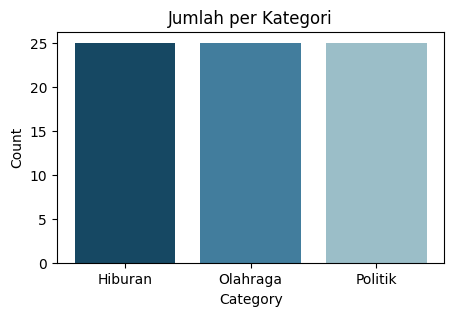

In [ ]:
plt.figure(figsize=(5, 3))
colors = ['#164863', '#427D9D', '#9BBEC8']
plt.bar(category_counts.index, category_counts.values, color=colors)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Jumlah per Kategori')
plt.show()

**4. Cek jumlah berita untuk tiap media**<br>
Karena berdasarkan soal kita perlu minimal 3 media jadi kita cek dulu benar atau tidak data kita ini terdiri dari minimal 3 media yang berbeda, dan berdasarkan ouputnya kita bisa lihat bahwa dataset kita terdiri dari 4 media yang berbeda yaitu kompas, merdeka, tribun, dan juga pikiran rakyat.

Kenapa jumlah kompas lebih banyak daripada 3 media yang lain? hal ini sudah saya jelaskan pada notebook yang saya gunakan untuk melakukan web scraping berikut https://colab.research.google.com/drive/1jkeGF61ikill0f8nblUtYFyzrjphKw1L?usp=sharing. Namun, singkatnya kompas ini lebih banyak karena yang berhasil di ekstrak oleh newspaper3k adalah berita dari media kompas saja dan sisa 3 media lainnnya pengambilan konten/teks beritanya dilakukan manual.

In [ ]:
media_counts = df['media'].value_counts()
media_counts

Kompas            30
Merdeka           15
Pikiran Rakyat    15
Tribun News       15
Name: media, dtype: int64

disini juga kita melakukan hal yang sama namun kita buatkan visualisasinya agar lebih berwarna 😁

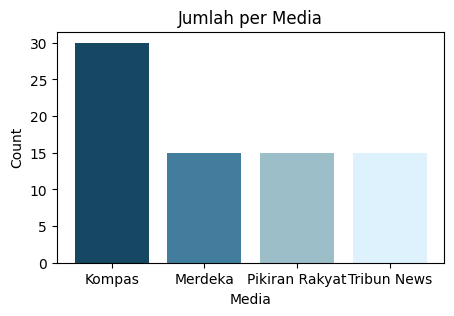

In [ ]:
plt.figure(figsize=(5, 3))
colors = ['#164863', '#427D9D', '#9BBEC8', '#DDF2FD']
plt.bar(media_counts.index, media_counts.values, color=colors)

plt.xlabel('Media')
plt.ylabel('Count')
plt.title('Jumlah per Media')
plt.show()

# **G) Text Preprocessing**

---
Pada tahapan ini kita akan melakukan preprocessing berupa cleansing terhadap data sesuai dengan yang diperintahkan oleh soal. Proses cleansing ini kita lakukan agar model kita nantinya akan lebih mudah mempelajari pattern pada data dan hanya mempelajari yang perlu dipelajari saja. Jika ada process yang tidak saya lakukan berarti saya menganggap hal tersebut untuk saat ini tidak perlu untuk dilakukan.

Pada tahap ini text cleaning yang akan dilakukan ada 7, yaitu:
1. Case Folding
2. Remove URL (co. https://blabla.com, www.blabla.com)
3. Remove Domain (co: Kompas.com, merdeka.com, blabla.co.id)
4. Remove Symbol (co: +/-&*@#)
5. Remove Slice, Tab, New space, dll
6. Remove Number
7. Remove Stopwords & extra spaces

Selain itu kita juga akan melakukan
1. Encoding label
2. Tokenisasi
3. Train test split

**1. Copy df ke dfClean**<br>
Pada tahap ini kita akan mencopy data frame original kita, yaitu df ke **dfClean** karena saya tidak ingin merubah-rubah data frame asli dan jika ada kesalahan harus read ulang datanya lagi dari file csv

In [ ]:
dfClean = df.copy()

**2. Drop kolom kecuali kolom text dan category**<br>
Pada tahap ini kita akan drop semua kolom kecuali kolom text dan category karena dalam kasus klasifikasi nantinya kita hanya perlu teks berita dan label kategorinya saja. Kita drop dengan cara memilih kolom text dan category saja lalu kita simpan kolom tersebut ke data frame baru bernama **dfClean** lagi

In [ ]:
dfClean = dfClean.loc[:, ['text', 'category']]
dfClean.head()

,text,category
0,KOMPAS.com - Jungkook BTS merilis album solo p...,Hiburan
1,"JAKARTA, KOMPAS.com- Istri penyanyi Virgoun, I...",Hiburan
2,"JAKARTA, KOMPAS.com - Penyanyi Teuku Ryzki ata...",Hiburan
3,KOMPAS.com - Tim penyidik kepolisian LA menjel...,Hiburan
4,KOMPAS.com - Aktor Matthew Perry ditemukan men...,Hiburan


**3. Case Folding**<br>
Pada tahap ini kita akan merubah semua teks berita pada kolom **teks** menjadi huruf kecil semua dan kita simpan ke kolom baru bernama **textLower**. Hal ini kita lakukan untuk memastikan konsistensi dan menghindari perbedaan antara huruf besar dan kecil dalam pemrosesan teks karena **Text** dan **text** dianggap sebagai dua hal yang berbeda. Selain itu pada soal tidak sebutkan untuk meng-tuning ataupun melakukan NER sehingga saya akan ubah saja semua datanya menjadi huruf kecil

In [ ]:
dfClean['textLower'] = dfClean['text'].str.lower()
dfClean.head()

,text,category,textLower
0,KOMPAS.com - Jungkook BTS merilis album solo p...,Hiburan,kompas.com - jungkook bts merilis album solo p...
1,"JAKARTA, KOMPAS.com- Istri penyanyi Virgoun, I...",Hiburan,"jakarta, kompas.com- istri penyanyi virgoun, i..."
2,"JAKARTA, KOMPAS.com - Penyanyi Teuku Ryzki ata...",Hiburan,"jakarta, kompas.com - penyanyi teuku ryzki ata..."
3,KOMPAS.com - Tim penyidik kepolisian LA menjel...,Hiburan,kompas.com - tim penyidik kepolisian la menjel...
4,KOMPAS.com - Aktor Matthew Perry ditemukan men...,Hiburan,kompas.com - aktor matthew perry ditemukan men...


Seperti yang kita lihat dibawah data kita sekarang semuanya sudah huruf kecil semua.

In [ ]:
dfClean['textLower'][0]

'kompas.com - jungkook bts merilis album solo perdananya, golden, pada jumat (3/11/2023) pukul 13.00 kst atau 11.00 wib.\n\nalbum tersebut berisi 10 lagu yang semuanya berbahasa inggris.\n\nagensinya, bighit music, mengatakan album tersebut menampilkan perjalanan jungkook, dari seorang maknae (anggota termuda) bts yang berevolusi menjadi bintang pop global.\n\ndilansir yonhapnews, jungkook bts terlibat sepenuhnya dalam proses pembuatan album golden.\n\njungkook ikut memilih lagu dari berbagai genre untuk menunjukkan spektrum musiknya yang luas.\n\nbaca juga: jungkook bts samai rekor psy di billboard hot 100\n\nalbum golden menampilkan "standing next to you" sebagai title track atau lagu utama.\n\nselain itu ada lagu "closer to you (feat. major lazer)" dan "yes or no (feat. shawn mendes)".\n\ndua singel yang sudah dirilis sebelumnya, "seven (feat. latto)" dan "3d (feat. jack harlow)" juga masuk dalam album tersebut.\n\ndalam siaran pers yang dirilis bighit music, jungkook menata rapi pe

**4. Remove URL**<br>
Pada tahap ini kita akan menghapus semua kata dengan awalan www\. atau https?:// atau http?: dll, agar semua url yang ada pada teks berita bisa terhapus, hal ini kita lakukan karena data tersebut saya anggap tidak akan menjadi fitur yang penting untuk memprediksi kategori berita

In [ ]:
dfClean['textNoUrl']=[re.sub(r'((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+) | ())', ' ', i)for i in dfClean['textLower']]
dfClean.head()

,text,category,textLower,textNoUrl
0,KOMPAS.com - Jungkook BTS merilis album solo p...,Hiburan,kompas.com - jungkook bts merilis album solo p...,kompas.com - jungkook bts merilis album solo p...
1,"JAKARTA, KOMPAS.com- Istri penyanyi Virgoun, I...",Hiburan,"jakarta, kompas.com- istri penyanyi virgoun, i...","jakarta, kompas.com- istri penyanyi virgoun, i..."
2,"JAKARTA, KOMPAS.com - Penyanyi Teuku Ryzki ata...",Hiburan,"jakarta, kompas.com - penyanyi teuku ryzki ata...","jakarta, kompas.com - penyanyi teuku ryzki ata..."
3,KOMPAS.com - Tim penyidik kepolisian LA menjel...,Hiburan,kompas.com - tim penyidik kepolisian la menjel...,kompas.com - tim penyidik kepolisian la menjel...
4,KOMPAS.com - Aktor Matthew Perry ditemukan men...,Hiburan,kompas.com - aktor matthew perry ditemukan men...,kompas.com - aktor matthew perry ditemukan men...


setelah kita cek ternyata masih ada link seperti kompas.com hal ini dikarenakan pada tahap sebelumnya kita hanya menghapuskan yang awalannya link saja, tapi disini kompas.com awalannya bukan www maupun http jadi kita perlu bersihkan lagi datanya

In [ ]:
dfClean['textNoUrl'][0]

'kompas.com - jungkook bts merilis album solo perdananya, golden, pada jumat (3/11/2023) pukul 13.00 kst atau 11.00 wib.\n\nalbum tersebut berisi 10 lagu yang semuanya berbahasa inggris.\n\nagensinya, bighit music, mengatakan album tersebut menampilkan perjalanan jungkook, dari seorang maknae (anggota termuda) bts yang berevolusi menjadi bintang pop global.\n\ndilansir yonhapnews, jungkook bts terlibat sepenuhnya dalam proses pembuatan album golden.\n\njungkook ikut memilih lagu dari berbagai genre untuk menunjukkan spektrum musiknya yang luas.\n\nbaca juga: jungkook bts samai rekor psy di billboard hot 100\n\nalbum golden menampilkan "standing next to you" sebagai title track atau lagu utama.\n\nselain itu ada lagu "closer to you (feat. major lazer)" dan "yes or no (feat. shawn mendes)".\n\ndua singel yang sudah dirilis sebelumnya, "seven (feat. latto)" dan "3d (feat. jack harlow)" juga masuk dalam album tersebut.\n\ndalam siaran pers yang dirilis bighit music, jungkook menata rapi pe

**5. Remove Domain**<br>
Pada tahap ini kita akan menghapus semua kata pada teks berita yang berikahiran .com atau .co.id atau .id. Hal ini kita lakukan untuk menghapus link pada data yang awalan katanya bukan dimulai dari www maupun http. Alasan kita menghapus domain dan url dahulu adalah jika kita hapus symbol dahulu nantinya susah untuk menumkan kata .com ataupun www./

In [ ]:
dfClean['textNoDomain']=[re.sub(r'\S*\.com\S*|\S*\.co\.id\S*|\S*\.id\S*', ' ', i)for i in dfClean['textNoUrl']]
dfClean.head()

,text,category,textLower,textNoUrl,textNoDomain
0,KOMPAS.com - Jungkook BTS merilis album solo p...,Hiburan,kompas.com - jungkook bts merilis album solo p...,kompas.com - jungkook bts merilis album solo p...,- jungkook bts merilis album solo perdananya...
1,"JAKARTA, KOMPAS.com- Istri penyanyi Virgoun, I...",Hiburan,"jakarta, kompas.com- istri penyanyi virgoun, i...","jakarta, kompas.com- istri penyanyi virgoun, i...","jakarta, istri penyanyi virgoun, inara rusli..."
2,"JAKARTA, KOMPAS.com - Penyanyi Teuku Ryzki ata...",Hiburan,"jakarta, kompas.com - penyanyi teuku ryzki ata...","jakarta, kompas.com - penyanyi teuku ryzki ata...","jakarta, - penyanyi teuku ryzki atau kiki tb..."
3,KOMPAS.com - Tim penyidik kepolisian LA menjel...,Hiburan,kompas.com - tim penyidik kepolisian la menjel...,kompas.com - tim penyidik kepolisian la menjel...,- tim penyidik kepolisian la menjelaskan fak...
4,KOMPAS.com - Aktor Matthew Perry ditemukan men...,Hiburan,kompas.com - aktor matthew perry ditemukan men...,kompas.com - aktor matthew perry ditemukan men...,- aktor matthew perry ditemukan meninggal du...


Seperti yang bisa kita lihat dibawah data kita itu sudah bersih dari url, tidak ada lagi kompas.com seperti yang kita lihat sebelumnya.

In [ ]:
dfClean['textNoDomain'][0]

'  - jungkook bts merilis album solo perdananya, golden, pada jumat (3/11/2023) pukul 13.00 kst atau 11.00 wib.\n\nalbum tersebut berisi 10 lagu yang semuanya berbahasa inggris.\n\nagensinya, bighit music, mengatakan album tersebut menampilkan perjalanan jungkook, dari seorang maknae (anggota termuda) bts yang berevolusi menjadi bintang pop global.\n\ndilansir yonhapnews, jungkook bts terlibat sepenuhnya dalam proses pembuatan album golden.\n\njungkook ikut memilih lagu dari berbagai genre untuk menunjukkan spektrum musiknya yang luas.\n\nbaca juga: jungkook bts samai rekor psy di billboard hot 100\n\nalbum golden menampilkan "standing next to you" sebagai title track atau lagu utama.\n\nselain itu ada lagu "closer to you (feat. major lazer)" dan "yes or no (feat. shawn mendes)".\n\ndua singel yang sudah dirilis sebelumnya, "seven (feat. latto)" dan "3d (feat. jack harlow)" juga masuk dalam album tersebut.\n\ndalam siaran pers yang dirilis bighit music, jungkook menata rapi perjalanan 

**6. Remove Symbol**<br>
Selanjutnya kita akan menghapus semua symbol seperti (.), (,), (!), (?), (@), (#) dll karena saya rasa hal tersebut tidak akan berpengaruh terhadap prediksi label kita, terlebih ini bukan sentiment analysis jadi menurut saya adanya (!) tidak perlu dipertahankan.

In [ ]:
dfClean['textNoSymbol']=[re.sub(r'[^\w\s]', ' ', i)for i in dfClean['textNoDomain']]
dfClean.head()

,text,category,textLower,textNoUrl,textNoDomain,textNoSymbol
0,KOMPAS.com - Jungkook BTS merilis album solo p...,Hiburan,kompas.com - jungkook bts merilis album solo p...,kompas.com - jungkook bts merilis album solo p...,- jungkook bts merilis album solo perdananya...,jungkook bts merilis album solo perdananya...
1,"JAKARTA, KOMPAS.com- Istri penyanyi Virgoun, I...",Hiburan,"jakarta, kompas.com- istri penyanyi virgoun, i...","jakarta, kompas.com- istri penyanyi virgoun, i...","jakarta, istri penyanyi virgoun, inara rusli...",jakarta istri penyanyi virgoun inara rusli...
2,"JAKARTA, KOMPAS.com - Penyanyi Teuku Ryzki ata...",Hiburan,"jakarta, kompas.com - penyanyi teuku ryzki ata...","jakarta, kompas.com - penyanyi teuku ryzki ata...","jakarta, - penyanyi teuku ryzki atau kiki tb...",jakarta penyanyi teuku ryzki atau kiki tb...
3,KOMPAS.com - Tim penyidik kepolisian LA menjel...,Hiburan,kompas.com - tim penyidik kepolisian la menjel...,kompas.com - tim penyidik kepolisian la menjel...,- tim penyidik kepolisian la menjelaskan fak...,tim penyidik kepolisian la menjelaskan fak...
4,KOMPAS.com - Aktor Matthew Perry ditemukan men...,Hiburan,kompas.com - aktor matthew perry ditemukan men...,kompas.com - aktor matthew perry ditemukan men...,- aktor matthew perry ditemukan meninggal du...,aktor matthew perry ditemukan meninggal du...


seperti kita lihat sekarang data kita sudah berish dari symbol-symbol diatas namun sayangnya masih ada new line atau tab seperti \n oleh karena it kita harus hapus karena disoal pun diperintahkan untuk menghapus symbol

In [ ]:
dfClean['textNoSymbol'][0]

'    jungkook bts merilis album solo perdananya  golden  pada jumat  3 11 2023  pukul 13 00 kst atau 11 00 wib \n\nalbum tersebut berisi 10 lagu yang semuanya berbahasa inggris \n\nagensinya  bighit music  mengatakan album tersebut menampilkan perjalanan jungkook  dari seorang maknae  anggota termuda  bts yang berevolusi menjadi bintang pop global \n\ndilansir yonhapnews  jungkook bts terlibat sepenuhnya dalam proses pembuatan album golden \n\njungkook ikut memilih lagu dari berbagai genre untuk menunjukkan spektrum musiknya yang luas \n\nbaca juga  jungkook bts samai rekor psy di billboard hot 100\n\nalbum golden menampilkan  standing next to you  sebagai title track atau lagu utama \n\nselain itu ada lagu  closer to you  feat  major lazer   dan  yes or no  feat  shawn mendes   \n\ndua singel yang sudah dirilis sebelumnya   seven  feat  latto   dan  3d  feat  jack harlow   juga masuk dalam album tersebut \n\ndalam siaran pers yang dirilis bighit music  jungkook menata rapi perjalanan 

**7. Remove Tab**<br>
Selanjutnya kita akan menghapus semua tab dan new space agar data kita jadi lebih rapi dan tidak ada symbol yang memang tidak kita perlukan

In [ ]:
dfClean['textNoTab'] = [re.sub(r'\t|\n|\n\n', ' ', i) for i in dfClean['textNoSymbol']]
dfClean.head()

,text,category,textLower,textNoUrl,textNoDomain,textNoSymbol,textNoTab
0,KOMPAS.com - Jungkook BTS merilis album solo p...,Hiburan,kompas.com - jungkook bts merilis album solo p...,kompas.com - jungkook bts merilis album solo p...,- jungkook bts merilis album solo perdananya...,jungkook bts merilis album solo perdananya...,jungkook bts merilis album solo perdananya...
1,"JAKARTA, KOMPAS.com- Istri penyanyi Virgoun, I...",Hiburan,"jakarta, kompas.com- istri penyanyi virgoun, i...","jakarta, kompas.com- istri penyanyi virgoun, i...","jakarta, istri penyanyi virgoun, inara rusli...",jakarta istri penyanyi virgoun inara rusli...,jakarta istri penyanyi virgoun inara rusli...
2,"JAKARTA, KOMPAS.com - Penyanyi Teuku Ryzki ata...",Hiburan,"jakarta, kompas.com - penyanyi teuku ryzki ata...","jakarta, kompas.com - penyanyi teuku ryzki ata...","jakarta, - penyanyi teuku ryzki atau kiki tb...",jakarta penyanyi teuku ryzki atau kiki tb...,jakarta penyanyi teuku ryzki atau kiki tb...
3,KOMPAS.com - Tim penyidik kepolisian LA menjel...,Hiburan,kompas.com - tim penyidik kepolisian la menjel...,kompas.com - tim penyidik kepolisian la menjel...,- tim penyidik kepolisian la menjelaskan fak...,tim penyidik kepolisian la menjelaskan fak...,tim penyidik kepolisian la menjelaskan fak...
4,KOMPAS.com - Aktor Matthew Perry ditemukan men...,Hiburan,kompas.com - aktor matthew perry ditemukan men...,kompas.com - aktor matthew perry ditemukan men...,- aktor matthew perry ditemukan meninggal du...,aktor matthew perry ditemukan meninggal du...,aktor matthew perry ditemukan meninggal du...


Sekarang data kita sudah bersih dari simbol-simbol yang tidak diperlukan

In [ ]:
dfClean['textNoTab'][0]

'    jungkook bts merilis album solo perdananya  golden  pada jumat  3 11 2023  pukul 13 00 kst atau 11 00 wib   album tersebut berisi 10 lagu yang semuanya berbahasa inggris   agensinya  bighit music  mengatakan album tersebut menampilkan perjalanan jungkook  dari seorang maknae  anggota termuda  bts yang berevolusi menjadi bintang pop global   dilansir yonhapnews  jungkook bts terlibat sepenuhnya dalam proses pembuatan album golden   jungkook ikut memilih lagu dari berbagai genre untuk menunjukkan spektrum musiknya yang luas   baca juga  jungkook bts samai rekor psy di billboard hot 100  album golden menampilkan  standing next to you  sebagai title track atau lagu utama   selain itu ada lagu  closer to you  feat  major lazer   dan  yes or no  feat  shawn mendes     dua singel yang sudah dirilis sebelumnya   seven  feat  latto   dan  3d  feat  jack harlow   juga masuk dalam album tersebut   dalam siaran pers yang dirilis bighit music  jungkook menata rapi perjalanan emosional sebuah h

**8. Remove Number**<br>
Saya tahu pada soal tidak diperintahkan untuk melakukan tuning maupun text cleansing selain yang diperintahkan pada soal tapi saya merasa number pada text hanya menggangu, namun karena disoal tidak diperintahkan jadinya saya hanya akan menghapus number pada teks berita yang categorynya bukan politik saja. Jadi yang category politik tetap ada karena saya pikir mungkin adanya angka seperi 2024 akan bisa memberi konteks bahwa itu adalah angka yang merujuk ke pemilu

In [ ]:
dfClean['textNoNumber'] = dfClean['textNoTab']
dfClean.loc[dfClean['category'] != 'Politik', 'textNoNumber'] = dfClean.loc[dfClean['category'] != 'Politik', 'textNoTab'].apply(lambda x: re.sub(r'\d+', ' ', x))
dfClean.head()

,text,category,textLower,textNoUrl,textNoDomain,textNoSymbol,textNoTab,textNoNumber
0,KOMPAS.com - Jungkook BTS merilis album solo p...,Hiburan,kompas.com - jungkook bts merilis album solo p...,kompas.com - jungkook bts merilis album solo p...,- jungkook bts merilis album solo perdananya...,jungkook bts merilis album solo perdananya...,jungkook bts merilis album solo perdananya...,jungkook bts merilis album solo perdananya...
1,"JAKARTA, KOMPAS.com- Istri penyanyi Virgoun, I...",Hiburan,"jakarta, kompas.com- istri penyanyi virgoun, i...","jakarta, kompas.com- istri penyanyi virgoun, i...","jakarta, istri penyanyi virgoun, inara rusli...",jakarta istri penyanyi virgoun inara rusli...,jakarta istri penyanyi virgoun inara rusli...,jakarta istri penyanyi virgoun inara rusli...
2,"JAKARTA, KOMPAS.com - Penyanyi Teuku Ryzki ata...",Hiburan,"jakarta, kompas.com - penyanyi teuku ryzki ata...","jakarta, kompas.com - penyanyi teuku ryzki ata...","jakarta, - penyanyi teuku ryzki atau kiki tb...",jakarta penyanyi teuku ryzki atau kiki tb...,jakarta penyanyi teuku ryzki atau kiki tb...,jakarta penyanyi teuku ryzki atau kiki tb...
3,KOMPAS.com - Tim penyidik kepolisian LA menjel...,Hiburan,kompas.com - tim penyidik kepolisian la menjel...,kompas.com - tim penyidik kepolisian la menjel...,- tim penyidik kepolisian la menjelaskan fak...,tim penyidik kepolisian la menjelaskan fak...,tim penyidik kepolisian la menjelaskan fak...,tim penyidik kepolisian la menjelaskan fak...
4,KOMPAS.com - Aktor Matthew Perry ditemukan men...,Hiburan,kompas.com - aktor matthew perry ditemukan men...,kompas.com - aktor matthew perry ditemukan men...,- aktor matthew perry ditemukan meninggal du...,aktor matthew perry ditemukan meninggal du...,aktor matthew perry ditemukan meninggal du...,aktor matthew perry ditemukan meninggal du...


karena text indeks ke-0 categornya hiburan jadi bisa kita lihat bahwa semua angka pada teks tersebut sudah terhapus

In [ ]:
dfClean['textNoNumber'][0]

'    jungkook bts merilis album solo perdananya  golden  pada jumat         pukul     kst atau     wib   album tersebut berisi   lagu yang semuanya berbahasa inggris   agensinya  bighit music  mengatakan album tersebut menampilkan perjalanan jungkook  dari seorang maknae  anggota termuda  bts yang berevolusi menjadi bintang pop global   dilansir yonhapnews  jungkook bts terlibat sepenuhnya dalam proses pembuatan album golden   jungkook ikut memilih lagu dari berbagai genre untuk menunjukkan spektrum musiknya yang luas   baca juga  jungkook bts samai rekor psy di billboard hot    album golden menampilkan  standing next to you  sebagai title track atau lagu utama   selain itu ada lagu  closer to you  feat  major lazer   dan  yes or no  feat  shawn mendes     dua singel yang sudah dirilis sebelumnya   seven  feat  latto   dan   d  feat  jack harlow   juga masuk dalam album tersebut   dalam siaran pers yang dirilis bighit music  jungkook menata rapi perjalanan emosional sebuah hubungan yan

selanjutnya saya ingin menghapus non ascii character, tapi mengingat ini datanya berasal dari laman formal atau media berita saya aga ragu melakukannya karena sepertinya tidak akan ada, oleh karena itu saya cek dahulu, dan karena benar tidak ada non ascii jadinya tidak perlu dibersihkan

In [ ]:
def contains_non_ascii(df, column):
    non_ascii_rows = []
    for i, text in enumerate(df[column]):
        if any(ord(char) > 127 for char in text):
            non_ascii_rows.append(i)
    return non_ascii_rows

non_ascii_rows = contains_non_ascii(dfClean, 'textNoTab')

if non_ascii_rows:
    print(f"Rows with non-ASCII characters: {non_ascii_rows}")
else:
    print("No non-ASCII characters found.")

No non-ASCII characters found.


**9. Remove Stopwords & extra spaces**<br>
Selanjutnya kita akan menghapus semua stopwords pada textNoNumber untuk menghapus kata-kata stopwords yang ada pada teks berdasarkan data frame dfStopword yang kita miliki. selain karena kita harus menghapus stopwords karena perintah soal tetapi penghapusan stopwords juga berguna karena akan menghapuskan kata-kata yang memang sering muncul dalam bahasa indonesia namun tidak punya informasi penting sehingga bisa mengurangi dimensi yang diproses = menghemat resource. Selain itu kita juga hapus white space/extra spaces agar nantinya tidak mempengaruhi hasi tokenisasi.

In [ ]:
dfClean['textClean'] = dfClean['textNoNumber'].apply(lambda x: ' '.join([word for word in x.split() if word not in dfStopword.stopword.values]))
dfClean.head()

,text,category,textLower,textNoUrl,textNoDomain,textNoSymbol,textNoTab,textNoNumber,textClean
0,KOMPAS.com - Jungkook BTS merilis album solo p...,Hiburan,kompas.com - jungkook bts merilis album solo p...,kompas.com - jungkook bts merilis album solo p...,- jungkook bts merilis album solo perdananya...,jungkook bts merilis album solo perdananya...,jungkook bts merilis album solo perdananya...,jungkook bts merilis album solo perdananya...,jungkook bts merilis album solo perdananya gol...
1,"JAKARTA, KOMPAS.com- Istri penyanyi Virgoun, I...",Hiburan,"jakarta, kompas.com- istri penyanyi virgoun, i...","jakarta, kompas.com- istri penyanyi virgoun, i...","jakarta, istri penyanyi virgoun, inara rusli...",jakarta istri penyanyi virgoun inara rusli...,jakarta istri penyanyi virgoun inara rusli...,jakarta istri penyanyi virgoun inara rusli...,jakarta istri penyanyi virgoun inara rusli ala...
2,"JAKARTA, KOMPAS.com - Penyanyi Teuku Ryzki ata...",Hiburan,"jakarta, kompas.com - penyanyi teuku ryzki ata...","jakarta, kompas.com - penyanyi teuku ryzki ata...","jakarta, - penyanyi teuku ryzki atau kiki tb...",jakarta penyanyi teuku ryzki atau kiki tb...,jakarta penyanyi teuku ryzki atau kiki tb...,jakarta penyanyi teuku ryzki atau kiki tb...,jakarta penyanyi teuku ryzki kiki tba membeber...
3,KOMPAS.com - Tim penyidik kepolisian LA menjel...,Hiburan,kompas.com - tim penyidik kepolisian la menjel...,kompas.com - tim penyidik kepolisian la menjel...,- tim penyidik kepolisian la menjelaskan fak...,tim penyidik kepolisian la menjelaskan fak...,tim penyidik kepolisian la menjelaskan fak...,tim penyidik kepolisian la menjelaskan fak...,tim penyidik kepolisian la fakta kematian akto...
4,KOMPAS.com - Aktor Matthew Perry ditemukan men...,Hiburan,kompas.com - aktor matthew perry ditemukan men...,kompas.com - aktor matthew perry ditemukan men...,- aktor matthew perry ditemukan meninggal du...,aktor matthew perry ditemukan meninggal du...,aktor matthew perry ditemukan meninggal du...,aktor matthew perry ditemukan meninggal du...,aktor matthew perry ditemukan meninggal dunia ...


sekarang data kita akhirnya sudah bersih dari stopwords dan juga extra spaces

In [ ]:
dfClean['textClean'][0]

'jungkook bts merilis album solo perdananya golden jumat kst wib album berisi lagu berbahasa inggris agensinya bighit music album menampilkan perjalanan jungkook maknae anggota termuda bts berevolusi bintang pop global dilansir yonhapnews jungkook bts terlibat sepenuhnya proses pembuatan album golden jungkook memilih lagu genre spektrum musiknya luas baca jungkook bts samai rekor psy billboard hot album golden menampilkan standing next to you title track lagu utama lagu closer to you feat major lazer yes or no feat shawn mendes singel dirilis seven feat latto d feat jack harlow masuk album siaran pers dirilis bighit music jungkook menata rapi perjalanan emosional hubungan berubah lagu lagu rancak jatuh cinta perjalanan berpindah lagu lagu melankolis emosi patah hati baca jungkook bts solois korea tempati top global spotify lagu'

**10. Simpan textClean dan category ke df baru**<br>
Selanjutnya kita akan pilih kolom textClean dan category saja untuk kita simpan ke df baru bernama dfAllClean agar dataframenya tidak terlalu panjang

In [ ]:
dfAllClean = dfClean.loc[:, ['textClean', 'category']]
dfAllClean

,textClean,category
0,jungkook bts merilis album solo perdananya gol...,Hiburan
1,jakarta istri penyanyi virgoun inara rusli ala...,Hiburan
2,jakarta penyanyi teuku ryzki kiki tba membeber...,Hiburan
3,tim penyidik kepolisian la fakta kematian akto...,Hiburan
4,aktor matthew perry ditemukan meninggal dunia ...,Hiburan
...,...,...
70,partai politik lokal aceh mendeklarasikan duku...,Politik
71,ketua dpp pdip djarot saiful hidayat membocork...,Politik
72,sekretaris jenderal sekjen partai amanat nasio...,Politik
73,wali kota solo gibran rakabuming raka buka sua...,Politik


**11. Ubah label ke dalam bentuk angka**<br>
Pada tahap ini kita akan mengubah semua label Hiburan menjadi 0, Olahraga menjadi 1, dan Politik jadi 2. Hal ini kita lakukan karena kita akan melakukan classification menggunakan machine learning yang memerlukan inputan berupa angka

In [ ]:
dfAllClean['category'] = dfAllClean['category'].replace({'Hiburan': 0, 'Olahraga': 1, 'Politik': 2})
dfAllClean.head()

,textClean,category
0,jungkook bts merilis album solo perdananya gol...,0
1,jakarta istri penyanyi virgoun inara rusli ala...,0
2,jakarta penyanyi teuku ryzki kiki tba membeber...,0
3,tim penyidik kepolisian la fakta kematian akto...,0
4,aktor matthew perry ditemukan meninggal dunia ...,0


**12. Tokenisasi**<br>
Pada tahapan ini kita akan melakukan tokenisasi untuk semua teks berita yang ada pada textClean menggunakan fungsi word_tokenize dari library nltk dan kemudian akan disimpan kedalam suatu kolom bernama token. Tokenisasi ini diperlukan karena sesuai dengan soal kita perlu membuat vector menggunakan Skipgram dan skipgram ini datanya harus dalam bentuk token baru nanti ketika membuat hidden layer pada model ANN inputannya berupa word dan outputnya context. Selain itu tokenisasi kita lakukan agar teks bisa dipecah jadi unit yang lebih kecil sehingga mudah untuk dikelola


In [ ]:
dfAllClean['token'] = dfAllClean['textClean'].apply(word_tokenize)
dfAllClean.head()

,textClean,category,token
0,jungkook bts merilis album solo perdananya gol...,0,"[jungkook, bts, merilis, album, solo, perdanan..."
1,jakarta istri penyanyi virgoun inara rusli ala...,0,"[jakarta, istri, penyanyi, virgoun, inara, rus..."
2,jakarta penyanyi teuku ryzki kiki tba membeber...,0,"[jakarta, penyanyi, teuku, ryzki, kiki, tba, m..."
3,tim penyidik kepolisian la fakta kematian akto...,0,"[tim, penyidik, kepolisian, la, fakta, kematia..."
4,aktor matthew perry ditemukan meninggal dunia ...,0,"[aktor, matthew, perry, ditemukan, meninggal, ..."


**13. Train test split**<br>
Di tahapan ini kita akan melakukan pemisahan data sebanyak 80% untuk kita train dan 20% nya untuk kita test, hal ini kita lakukan karena data kita sangat sedikit jadi saya ingin memastikan bahwa data yang di train punya lebih banyak corpus. Selain itu kita juga stratify pemisahannya berdasarkan category sehingga proporsi jumlah kategori pada data train akan tetap sama dengan dataframe awal jadinya ga akan imbalance.

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(dfAllClean['token'], dfAllClean['category'], test_size = 0.2, random_state = 13, stratify=dfAllClean['category'])

In [ ]:
xTrain

38    [olahraga, aktivitas, fisik, rutin, kegiatan, ...
43    [bacawapres, muhaimin, iskandar, keras, berbic...
19    [indonesia, arena, senayan, jakarta, saksi, se...
9     [agensi, yg, entertainment, bocoran, debut, ba...
42    [saiful, mahfud, cak, imin, gibran, membantu, ...
21    [jakarta, direktur, penyidikan, jampidsus, kej...
56    [angggota, dpr, fraksi, pdi, perjuangan, masin...
60    [warna, keberuntungan, shio, imlek, warna, keb...
17    [timnas, indonesia, memuncaki, klasemen, sepak...
23    [jakarta, kepala, pusat, penerangan, hukum, ka...
12    [persaingan, papan, klasemen, liga, memanas, m...
16    [laga, pekan, liga, diwarnai, kartu, merah, pe...
71    [ketua, dpp, pdip, djarot, saiful, hidayat, me...
41    [presiden, jokowi, mengundang, capres, pekan, ...
8     [vokalis, noah, ariel, mengaku, sahabatnya, uk...
62    [simak, ramalan, zodiak, cinta, bintang, besok...
34    [artis, cantik, rebecca, klopper, dibicarakan,...
13    [pesenam, artistik, indonesia, rifda, irfa

In [ ]:
xTest

46    [penampilan, kontroversial, lisa, blackpink, l...
74    [ketua, tim, pemenangan, nasional, tpn, ganjar...
48    [daily, dose, of, sunshine, salah, serial, kor...
55    [pemerintah, mengeluarkan, aturan, terbaru, ap...
53    [kalinya, warga, negara, asing, masuk, indones...
37    [olahraga, kebutuhan, kesehatan, tubuh, tubuh,...
26    [jakarta, juru, bicara, detasemen, khusus, den...
6     [jakarta, aktris, peran, indah, permatasari, m...
30    [artis, korea, selatan, berbondong, bondong, m...
63    [penganan, manis, diyakini, memunculkan, kebah...
73    [wali, kota, solo, gibran, rakabuming, raka, b...
18    [indonesia, melawan, turkmenistan, partai, pam...
11    [presiden, fifa, gianni, infantino, resmi, men...
36    [olahraga, menjaga, kesehatan, kebugaran, tubu...
59    [partai, keadilan, sejahtera, pks, mengaku, he...
Name: token, dtype: object

In [ ]:
print("xTrain:", xTrain.shape)
print("yTrain:", yTrain.shape)
print("xTest:", xTest.shape)
print("yTest:", yTest.shape)

xTrain: (60,)
yTrain: (60,)
xTest: (15,)
yTest: (15,)


# **G) Text Representation Skipgram**

---
Pada tahapan ini kita akan membuat vector sebagai input pada model machine learning kita dengan menggunakan skipgram sesuai dengan ketentuan dari soal

**1. Buat model Skipgram**<br>
Pada tahap ini kita akan membuat model skipgram dengan menggunakan data xTrain yang berupa token dengan paremeter min_count  = 3 untuk menentukan jumlah minimal kemunculan token= 3 untuk dapat dimasukan kedalam model. Lalu kita assign juga vector_size = 50 yang berarti setiap token nantinya akan direpresentasikan dengan vector ukuran 50, disini juga kita atur window = 5 karena 1 dokumen itu jumlah tokennya cukup banyak, terakhir kita atur parameter sg = 1 untuk memilih algoritma Skipgram.

<br>Singkatnya tahap ini akan membuat model skipgram dari data xTrain, dengan ukuran vektor 50, ukuran window 5, dan hanya mempertimbangkan kata-kata/token yang muncul setidaknya 3 kali


In [ ]:
modelSkipgram = gensim.models.Word2Vec(xTrain, min_count = 3, vector_size = 50, window = 5, sg=1)

**2. Membuat vocabulry**<br>
Pada tahap ini kita akan buat suatu vocabulary dari model skipgram. Vocabulary ini berisi setiap kata/token unik dalam data pelatihan dan indeksnya dalam model

In [ ]:
vocabularySkipgram = modelSkipgram.wv.key_to_index
print(vocabularySkipgram)

{'baca': 0, 'indonesia': 1, 'presiden': 2, 'jakarta': 3, '2023': 4, 'celine': 5, 'evangelista': 6, 'tim': 7, 'orang': 8, 'partai': 9, 'hasil': 10, 'olahraga': 11, 'liga': 12, 'laga': 13, 'pasangan': 14, 'lagu': 15, 'dunia': 16, 'aceh': 17, 'perry': 18, 'jungkook': 19, 'medali': 20, 'ketua': 21, 'united': 22, 'fc': 23, 'ganjar': 24, 'pertandingan': 25, '11': 26, 'gibran': 27, 'menit': 28, 'acara': 29, '2024': 30, 'emas': 31, 'vs': 32, 'posisi': 33, 'rumah': 34, 'warga': 35, 'anak': 36, 'anies': 37, 'bts': 38, 'jam': 39, 'shio': 40, 'memiliki': 41, 'klasemen': 42, 'jokowi': 43, 'persib': 44, 'pemilu': 45, 'matthew': 46, 'kalori': 47, 'rp': 48, 'cak': 49, 'gol': 50, 'mahfud': 51, 'tiket': 52, 'oktober': 53, 'pekan': 54, 'kelinci': 55, 'games': 56, 'asian': 57, 'anggota': 58, 'jumat': 59, 'luhut': 60, 'munif': 61, 'salah': 62, 'kiai': 63, 'kejagung': 64, 'calon': 65, 'muhaimin': 66, 'kemenangan': 67, 'imin': 68, 'peringkat': 69, 'noah': 70, 'pdi': 71, 'pemain': 72, 'agung': 73, 'teroris': 

**3. Membuat sentence vector**
Selanjutnya kita akan membuat suatu fungsi bernama sentence_vector untuk mengubah kalimat menjadi satu vektor dengan mengambil rata-rata dari vektor semua kata dalam kalimat tersebut.Jadi singkatnya kita melakukan tahapan ini tuh karena kita butuh vector dari seluruh kalimat bukan hanya per token/kata untuk melakukan klasifikasi, sedangkan dari model skipgram tuh kita udah buat setiap token jadi vector.

In [ ]:
def sentence_vector(sentence, model):
    return np.mean([model.wv[word] for word in sentence if word in model.wv], axis=0)

In [ ]:
xTrain_vector = [sentence_vector(sentence, modelSkipgram) for sentence in xTrain]
xTest_vector = [sentence_vector(sentence, modelSkipgram) for sentence in xTest]

**5. Menampilkan 1 vector**<br>
Pada tahap ini kita akan mengambil vektor untuk setiap kata dalam vocabulary model dan mencetak vektor kedua. kita lakukan ini hanya untuk mengecek apa kah benar 1 vector itu sizenya 50 dan memang benar

In [ ]:
vectorsSkipgram = [modelSkipgram.wv.get_vector(word)for word in vocabularySkipgram]
vectorsSkipgram[1]

array([ 0.0814626 , -0.01698928,  0.00197662, -0.00250646,  0.06828052,
       -0.24304938,  0.10441936,  0.4261325 , -0.39749956, -0.08255455,
        0.06742044, -0.29972902, -0.1679099 ,  0.03738479, -0.277313  ,
        0.16469564,  0.03484114, -0.07245284, -0.49454257, -0.16985442,
       -0.02208598,  0.10816542,  0.3211239 , -0.02691081,  0.2616611 ,
        0.1471057 ,  0.06775771, -0.0856    , -0.33749032,  0.1092803 ,
        0.16251697,  0.02945684, -0.24013953,  0.13466851, -0.18455257,
        0.1675562 ,  0.13732512,  0.13753548,  0.14765085, -0.52126175,
        0.3639186 , -0.10923237, -0.03762918,  0.10037381,  0.5380881 ,
        0.22913797, -0.04660721, -0.26371405,  0.31352785,  0.21158807],
      dtype=float32)

# **H) Prediksi label menggunakan machine learning menggunakan vector hasil Skipgram**

---
Pada tahapan ini kita akan melakukan prediksi untuk mengklasifikasikan label kategori dari tiap data test menggunakan 2 model machine learning yaitu SVM dan Random Forest

**1. SVM**<br>
pada tahap ini kita akan pertama-tama melatih modelSVM menggunakan xTrain_vector yang didapat dari hasil skipgram, lalu kita akan prediksi xTestVector dan kita buatkan classification report untuk melakukan evaluasi

In [ ]:
modelSVM = svm.LinearSVC( random_state=13)
modelSVM.fit(xTrain_vector, yTrain)

LinearSVC(random_state=13)

In [ ]:
predictSVM = modelSVM.predict(xTest_vector)

Seperti yang kita lihat, hasil prediksi menggunakan **model SVM **dengan vector hasil **skipgram** menghasilkan akurasi sebesar **(0.60)**

In [ ]:
print(classification_report(yTest, predictSVM, target_names=['0','1','2']))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       1.00      0.40      0.57         5
           2       0.44      0.80      0.57         5

    accuracy                           0.60        15
   macro avg       0.73      0.60      0.60        15
weighted avg       0.73      0.60      0.60        15



**2. Random Forest**<br>
pada tahap ini kita akan pertama-tama melatih modelRF menggunakan xTrain_vector yang didapat dari hasil skipgram, lalu kita akan prediksi xTestVector dan kita buatkan classification report untuk melakukan evaluasi

In [ ]:
modelRF = RandomForestClassifier(random_state=13)
modelRF.fit(xTrain_vector, yTrain)

RandomForestClassifier(random_state=13)

In [ ]:
predictRF = modelRF.predict(xTest_vector)

Seperti yang kita lihat, hasil prediksi menggunakan **model Random Forest** dengan vector hasil **skipgram** menghasilkan akurasi sebesar **(0.80)**

In [ ]:
print(classification_report(yTest, predictRF, target_names=['0','1','2']))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       1.00      1.00      1.00         5
           2       0.67      0.80      0.73         5

    accuracy                           0.80        15
   macro avg       0.81      0.80      0.80        15
weighted avg       0.81      0.80      0.80        15



# **I) Text Representation TF-IDF**

---
Pada tahapan ini kita akan membuat vector sebagai input pada model machine learning kita dengan menggunakan TF-IDF. Saya memilih text representation menggunakan TF-IDF karena menurut saya TF-IDF ini sudah cukup baik karena dia tidak hanya mempertimbangkan frekuensi token pada dokumen saja tapi juga mempertimbangkan frekuensinya pada corpus sehingga kita akan tau mana saja token yang banyak muncul karena memang sepertinya penting dan mana yang banyak muncul tapi kurang bermakna.

**1. Gabungkan xTrain dan xTest**<br>
Pada tahap ini kita akan mengubah list kata dalam data pelatihan dan pengujian menjadi string, dengan menggabungkan kata-kata dalam setiap list dengan spasi. Hal ini kita lakukan karena TF-IDF perlu input berupa string bukan token

In [ ]:
xTrain_str = [' '.join(words) for words in xTrain]
xTest_str = [' '.join(words) for words in xTest]

In [ ]:
vectorizer = TfidfVectorizer()
xTrain_tfidf = vectorizer.fit_transform(xTrain_str)
xTest_tfidf = vectorizer.transform(xTest_str)

In [ ]:
TFIDF = pd.DataFrame(xTrain_tfidf.toarray(),columns=vectorizer.get_feature_names_out())
TFIDF.head()

,09,10,11,12,13,154,16,17,18,19,...,zhejiang,ziarah,zikir,zodiac,zodiak,zona,zuhri,zulhas,zulkifli,zumba
0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.03865,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **J) Prediksi label menggunakan machine learning menggunakan vector hasil TF-IDF**

---
Pada tahapan ini kita akan melakukan prediksi untuk mengklasifikasikan label kategori dari tiap data test menggunakan 2 model machine learning yaitu SVM dan Random Forest

**1. SVM**<br>
pada tahap ini kita akan pertama-tama melatih modelSVM menggunakan xTrain_vector yang didapat dari hasil TF-IDF, lalu kita akan prediksi xTestVector dan kita buatkan classification report untuk melakukan evaluasi

In [ ]:
modelSVMtfidf = svm.LinearSVC( random_state=13)
modelSVMtfidf.fit(xTrain_tfidf, yTrain)

LinearSVC(random_state=13)

In [ ]:
predictSVMtfidf = modelSVMtfidf.predict(xTest_tfidf)

Seperti yang kita lihat, hasil prediksi menggunakan **model SVM** dengan vector hasil **TF-IDF** menghasilkan akurasi sebesar **(0.93)**

In [ ]:
print(classification_report(yTest, predictSVMtfidf, target_names=['0','1','2']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.80      0.89         5
           2       0.83      1.00      0.91         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



**2. Random Forest**<br>
pada tahap ini kita akan pertama-tama melatih modelRF menggunakan xTrain_vector yang didapat dari hasil TF-IDF, lalu kita akan prediksi xTestVector dan kita buatkan classification report untuk melakukan evaluasi

In [ ]:
modelRFtfidf = RandomForestClassifier(random_state=13)
modelRFtfidf.fit(xTrain_tfidf, yTrain)

RandomForestClassifier(random_state=13)

In [ ]:
predictRFtfidf = modelRFtfidf.predict(xTest_tfidf)

Seperti yang kita lihat, hasil prediksi menggunakan **model Random Forest** dengan vector hasil **TF-IDF** menghasilkan akurasi sebesar **(0.93)**

In [ ]:
print(classification_report(yTest, predictRFtfidf, target_names=['0','1','2']))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      1.00      1.00         5
           2       1.00      0.80      0.89         5

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15



# **K) Summary 1**

---

Accuracy:
* Skipgram SVM: 0.60
* Skipgram RF: 0.80
* TF-IDF SVM: 0.93
* TF-IDF RF: 0.93

Berdasarkan accuracynya dapat kita simpulkan bahwa model SVM dan RF dengan vector yang dihasilkan dari TF-IDF memiliki accuracy yang paling besar dan keduanya sama-sama besar, hal ini mungkin dikarenakan TF-IDF memberikan bobot pada setiap kata dalam dokumen berdasarkan frekuensi kemunculannya dalam dokumen tersebut dan di seluruh kumpulan dokumen. Kata-kata yang sering muncul dalam satu dokumen tetapi jarang muncul di dokumen lain akan mendapatkan bobot yang lebih tinggi. Hal ini dapat membantu model dalam mengidentifikasi fitur penting dan membedakan antara kategori.

Sementara disisi lain, model Skipgram menghasilkan representasi vektor kata yang berdasarkan konteks di mana kata tersebut muncul, dan mungkin tidak seefektif TF-IDF dalam kasus klasifikasi teks ini. Namun, semua itu balik lagi ke parameter yang digunakan, mungkin saja jika menggunakan vector size 300 seperti yang disebutkan google hasilnya akan lebih bagus.

Balik lagi disini hasilnya cukup memuaskan juga karena datanya saya kumpulkan sedemikian rupa agar jumlah labelnya balance sehingga model tidak akan bias ke salah satu atau 2 label yang lebih banyak teks beritanya.

# **L) Experiment**

---
Pada tahapan ini kita akan melakukan preprocessing tambahan berupa penghapusan semua number, penghapusan stopwords menggunakan library spacy, dan lemmatization menggunakan nlp-id

**1. Copy dfClean**<br>
Copy dahulu dataframe dfClean untuk makesure dfClean tidak terubah-ubah lalu tampilkan semua kolomnya

In [ ]:
dfAllClean = dfClean.copy()
dfAllClean.columns

Index(['text', 'category', 'textLower', 'textNoUrl', 'textNoDomain',
       'textNoSymbol', 'textNoTab', 'textNoNumber', 'textClean'],
      dtype='object')

**2. Pilih kolom textNoTab dan category**<br>
Kita pilih textNoTab karena kita butuh teks yang sudah mengalami semua tahap cleaning sebelum dihapus numbernya

In [ ]:
dfAllClean = dfClean.loc[:, ['textNoTab', 'category']]
dfAllClean

,textNoTab,category
0,jungkook bts merilis album solo perdananya...,Hiburan
1,jakarta istri penyanyi virgoun inara rusli...,Hiburan
2,jakarta penyanyi teuku ryzki atau kiki tb...,Hiburan
3,tim penyidik kepolisian la menjelaskan fak...,Hiburan
4,aktor matthew perry ditemukan meninggal du...,Hiburan
...,...,...
70,tiga partai politik lokal aceh mendeklarasikan...,Politik
71,ketua dpp pdip djarot saiful hidayat membocor...,Politik
72,sekretaris jenderal sekjen partai amanat nas...,Politik
73,wali kota solo gibran rakabuming raka buka s...,Politik


**3. Hapus semua number pada teks**<br>
Disini kita hapus semua angka pada teks berita dan kita simpan sebagai textNoNumber

In [ ]:
dfAllClean['textNoNumber'] = [re.sub(r'\d+', ' ', i) for i in dfAllClean['textNoTab']]
dfAllClean.head()

,textNoTab,category,textNoNumber
0,jungkook bts merilis album solo perdananya...,Hiburan,jungkook bts merilis album solo perdananya...
1,jakarta istri penyanyi virgoun inara rusli...,Hiburan,jakarta istri penyanyi virgoun inara rusli...
2,jakarta penyanyi teuku ryzki atau kiki tb...,Hiburan,jakarta penyanyi teuku ryzki atau kiki tb...
3,tim penyidik kepolisian la menjelaskan fak...,Hiburan,tim penyidik kepolisian la menjelaskan fak...
4,aktor matthew perry ditemukan meninggal du...,Hiburan,aktor matthew perry ditemukan meninggal du...


**4. Hapus stopwords menggunakan library spacy**<br>
Pada tahap ini alih-alih menggunakan dfStopwords kita akan hapus menggunakan library spacy saja, karena sepengetahuan saya library spacy ini punya jumlah stopwords yang berbeda

In [ ]:
nlp = spacy.blank('id')

def remove_stopwords(text):
    doc = nlp(text)
    text_no_stopword = ' '.join([token.text for token in doc if token.text not in STOP_WORDS])
    return text_no_stopword

In [ ]:
dfAllClean['textClean'] = dfAllClean['textNoNumber'].apply(remove_stopwords)
dfAllClean.head()

,textNoTab,category,textNoNumber,textClean
0,jungkook bts merilis album solo perdananya...,Hiburan,jungkook bts merilis album solo perdananya...,jungkook bts merilis album solo perdanany...
1,jakarta istri penyanyi virgoun inara rusli...,Hiburan,jakarta istri penyanyi virgoun inara rusli...,jakarta istri penyanyi virgoun inara rus...
2,jakarta penyanyi teuku ryzki atau kiki tb...,Hiburan,jakarta penyanyi teuku ryzki atau kiki tb...,jakarta penyanyi teuku ryzki kiki tba me...
3,tim penyidik kepolisian la menjelaskan fak...,Hiburan,tim penyidik kepolisian la menjelaskan fak...,tim penyidik kepolisian la fakta kematian...
4,aktor matthew perry ditemukan meninggal du...,Hiburan,aktor matthew perry ditemukan meninggal du...,aktor matthew perry ditemukan meninggal d...


**5. Lemmatization menggunakan nlp-id**<br>
Pada tahap ini kita akan melakukan lemmatization agar jumlah dimensi katanya berkurang sehingga bisa lebih hemat resource

In [ ]:
lemmatizer = Lemmatizer()

In [ ]:
def lemmatize_text(text):
    return lemmatizer.lemmatize(text)

In [ ]:
dfAllClean['textLemmatize'] = dfAllClean['textClean'].apply(lemmatize_text)
dfAllClean.head()

,textNoTab,category,textNoNumber,textClean,textLemmatize
0,jungkook bts merilis album solo perdananya...,Hiburan,jungkook bts merilis album solo perdananya...,jungkook bts merilis album solo perdanany...,jungkook bts rilis album solo perdana golden j...
1,jakarta istri penyanyi virgoun inara rusli...,Hiburan,jakarta istri penyanyi virgoun inara rusli...,jakarta istri penyanyi virgoun inara rus...,jakarta istri nyanyi virgoun inara rusli alas ...
2,jakarta penyanyi teuku ryzki atau kiki tb...,Hiburan,jakarta penyanyi teuku ryzki atau kiki tb...,jakarta penyanyi teuku ryzki kiki tba me...,jakarta nyanyi teuku ryzki kiki tba beber tang...
3,tim penyidik kepolisian la menjelaskan fak...,Hiburan,tim penyidik kepolisian la menjelaskan fak...,tim penyidik kepolisian la fakta kematian...,tim sidik polisi la fakta mati aktor matthew p...
4,aktor matthew perry ditemukan meninggal du...,Hiburan,aktor matthew perry ditemukan meninggal du...,aktor matthew perry ditemukan meninggal d...,aktor matthew perry temu tinggal dunia bak jac...


dapat kita cek disini kata "perdananya" sudah terubah menjadi "perdana" karena telah di lemmatization

In [ ]:
dfAllClean['textLemmatize'][0]

'jungkook bts rilis album solo perdana golden jumat kst wib album isi lagu bahasa inggris agens bighit music album tampil jalan jungkook maknae anggota muda bts evolusi bintang pop global lansir yonhapnews jungkook bts libat sepenuh proses buat album golden jungkook pilih lagu genre spektrum musik luas baca jungkook bts sama rekor psy billboard hot album golden tampil standing next to you title track lagu utama lagu closer to you feat major lazer yes or no feat shawn mendes singel rilis seven feat latto d feat jack harlow masuk album siar pers rilis bighit music jungkook tata rapi jalan emosional hubung ubah lagu lagu rancak jatuh cinta jalan pindah lagu lagu melankolis emosi patah hati baca jungkook bts solois korea tempat top global spotify lagu'

**6. Ubah semua label jadi bentuk numerik**<br>
Kita lakukan ini karena model machine learning perlu input berupa angka

In [ ]:
dfAllClean['category'] = dfAllClean['category'].replace({'Hiburan': 0, 'Olahraga': 1, 'Politik': 2})
dfAllClean.head()

,textNoTab,category,textNoNumber,textClean,textLemmatize
0,jungkook bts merilis album solo perdananya...,0,jungkook bts merilis album solo perdananya...,jungkook bts merilis album solo perdanany...,jungkook bts rilis album solo perdana golden j...
1,jakarta istri penyanyi virgoun inara rusli...,0,jakarta istri penyanyi virgoun inara rusli...,jakarta istri penyanyi virgoun inara rus...,jakarta istri nyanyi virgoun inara rusli alas ...
2,jakarta penyanyi teuku ryzki atau kiki tb...,0,jakarta penyanyi teuku ryzki atau kiki tb...,jakarta penyanyi teuku ryzki kiki tba me...,jakarta nyanyi teuku ryzki kiki tba beber tang...
3,tim penyidik kepolisian la menjelaskan fak...,0,tim penyidik kepolisian la menjelaskan fak...,tim penyidik kepolisian la fakta kematian...,tim sidik polisi la fakta mati aktor matthew p...
4,aktor matthew perry ditemukan meninggal du...,0,aktor matthew perry ditemukan meninggal du...,aktor matthew perry ditemukan meninggal d...,aktor matthew perry temu tinggal dunia bak jac...


**7. Tokenisasi**<br>
Disini kita akan melakukan tokenisasi karena kita hanya akan menggunakan skipgram untuk membuat vector dan skipgram perlu input berupa vector (skipgram saja karena tidak ada arahan dari soal untuk melakukan tuning jadi saya hanya mau bereksperimen saja)

In [ ]:
dfAllClean['token'] = dfAllClean['textLemmatize'].apply(word_tokenize)
dfAllClean.head()

,textNoTab,category,textNoNumber,textClean,textLemmatize,token
0,jungkook bts merilis album solo perdananya...,0,jungkook bts merilis album solo perdananya...,jungkook bts merilis album solo perdanany...,jungkook bts rilis album solo perdana golden j...,"[jungkook, bts, rilis, album, solo, perdana, g..."
1,jakarta istri penyanyi virgoun inara rusli...,0,jakarta istri penyanyi virgoun inara rusli...,jakarta istri penyanyi virgoun inara rus...,jakarta istri nyanyi virgoun inara rusli alas ...,"[jakarta, istri, nyanyi, virgoun, inara, rusli..."
2,jakarta penyanyi teuku ryzki atau kiki tb...,0,jakarta penyanyi teuku ryzki atau kiki tb...,jakarta penyanyi teuku ryzki kiki tba me...,jakarta nyanyi teuku ryzki kiki tba beber tang...,"[jakarta, nyanyi, teuku, ryzki, kiki, tba, beb..."
3,tim penyidik kepolisian la menjelaskan fak...,0,tim penyidik kepolisian la menjelaskan fak...,tim penyidik kepolisian la fakta kematian...,tim sidik polisi la fakta mati aktor matthew p...,"[tim, sidik, polisi, la, fakta, mati, aktor, m..."
4,aktor matthew perry ditemukan meninggal du...,0,aktor matthew perry ditemukan meninggal du...,aktor matthew perry ditemukan meninggal d...,aktor matthew perry temu tinggal dunia bak jac...,"[aktor, matthew, perry, temu, tinggal, dunia, ..."


**8. simpan token dan category saja**<br>
kita simpan kedalam dfAllClean

In [ ]:
dfAllClean = dfAllClean.loc[:, ['token', 'category']]
dfAllClean

,token,category
0,"[jungkook, bts, rilis, album, solo, perdana, g...",0
1,"[jakarta, istri, nyanyi, virgoun, inara, rusli...",0
2,"[jakarta, nyanyi, teuku, ryzki, kiki, tba, beb...",0
3,"[tim, sidik, polisi, la, fakta, mati, aktor, m...",0
4,"[aktor, matthew, perry, temu, tinggal, dunia, ...",0
...,...,...
70,"[partai, politik, lokal, aceh, deklarasi, duku...",2
71,"[ketua, dpp, pdip, djarot, saiful, hidayat, bo...",2
72,"[sekretaris, jenderal, sekjen, partai, amanat,...",2
73,"[wali, kota, solo, gibran, rakabuming, raka, b...",2


**9. Train test split**<br>
Train test split dengan ukuran 80% train dan 20% test

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(dfAllClean['token'], dfAllClean['category'], test_size = 0.2, random_state = 13, stratify=dfAllClean['category'])

**10. Buat vector skipgram**<br>
Buat vector skipgram dengan ukuran vector 50 dan ukuran window 5 dengan minimal kemunculan kata 3

In [ ]:
modelSkipgramLemmatize = gensim.models.Word2Vec(xTrain, min_count = 3, vector_size = 50, window = 5, sg=1)

In [ ]:
vocabularySkipgramLemmatize = modelSkipgramLemmatize.wv.key_to_index

In [ ]:
xTrain_vector = [sentence_vector(sentence, modelSkipgramLemmatize) for sentence in xTrain]
xTest_vector = [sentence_vector(sentence, modelSkipgramLemmatize) for sentence in xTest]

**10. SVM Lemmatize**<br>
kita latih model svm dari vector skipgram yang di lemmatize, lalu prediksi data tesnya dan evaluasi

In [ ]:
modelSVMLemmatize = svm.LinearSVC(random_state=13)
modelSVMLemmatize.fit(xTrain_vector, yTrain)

LinearSVC(random_state=13)

In [ ]:
predictSVMLemmatize = modelSVMLemmatize.predict(xTest_vector)

Seperti yang kita lihat, hasil prediksi menggunakan **model SVM** dengan vector hasil **skipgram** yang di **lemmatize** menghasilkan akurasi sebesar **(0.67)**

In [ ]:
print(classification_report(yTest, predictSVMLemmatize, target_names=['0','1','2']))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      0.40      0.57         5
           2       0.50      0.80      0.62         5

    accuracy                           0.67        15
   macro avg       0.77      0.67      0.66        15
weighted avg       0.77      0.67      0.66        15



In [ ]:
modelRFLemmatize = RandomForestClassifier(random_state=13)
modelRFLemmatize.fit(xTrain_vector, yTrain)

RandomForestClassifier(random_state=13)

In [ ]:
predictRFLemmatize = modelRFLemmatize.predict(xTest_vector)

Seperti yang kita lihat, hasil prediksi menggunakan **model Random Forest** dengan vector hasil **skipgram** yang di **lemmatize** menghasilkan akurasi sebesar **(0.80)**

In [ ]:
print(classification_report(yTest, predictRFLemmatize, target_names=['0','1','2']))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.67      0.80      0.73         5
           2       0.83      1.00      0.91         5

    accuracy                           0.80        15
   macro avg       0.83      0.80      0.80        15
weighted avg       0.83      0.80      0.80        15



# **M) Summary 2**

---

Accuracy:
* Skipgram SVM: 0.60
* Skipgram RF: 0.80
* TF-IDF SVM: 0.93
* TF-IDF RF: 0.93
* Skipgram SVM Lemmatize,dll: 0.67
* Skipgram RF Lemmatize, dll: 0.80

Berdasarkan accuracynya dapat kita simpulkan bahwa model SVM dan RF dengan vector yang dihasilkan dari TF-IDF memiliki accuracy yang paling besar dan keduanya sama-sama besar sesuai dengan summary 1 yang sudah dijelaskan sebelumnya. Tapi disini bisa kita lihat bahwa model skipgram yang kita hapuskan semua number dan kita lemmatization hasilnya lebih bagus untuk model SVM dan sama saja untuk model Random Forest hal ini mungkin bisa kita simpulkan bahwa dengan melakukan preprocessing lanjutan model kita akan bisa memprediksi lebih baik.

Tapi tetep saja, disini saya tidak melakukan advance preprocessing seperti NER maupun POS Tagging, dll saya juga tidak mencoba menggunakan text representation seperti count vectorizer, dll sehingga saya tidak bisa menyimpulkan bahwa TF-IDF yang paling baik, namun jika melihat dari accuracynya saja dibandingkan dengan skipgram TF-IDF ini lebih baik.

# **J) References**

---
[1] https://www.kaggle.com/datasets/oswinrh/indonesian-stoplist<br>
[2] https://www.kaggle.com/code/syauqiddjohan/skripsi-sentiment-analysis-project<br>
[3] https://www.kaggle.com/code/rizkia14/text-pre-processing-with-python-id-en#Lemmatization-bahasa-Indonesia<br>
[4] https://www.kaggle.com/code/ilhamfp31/preprocessing-the-indonesian-hate-abusive-text/notebook<br>
[5] https://colab.research.google.com/drive/1DTu6y5uR9XzNub-awKP5ADDoeUeslfCh?usp=sharing#scrollTo=ySiW-_Itt0Z_<br>
[6] https://drive.google.com/file/d/1QL-ql3CGFXO7038YFsiStjXNsEzNyFO2/view?usp=sharing<br>
[7] https://drive.google.com/file/d/1TOVaP6luyvLsy3SWdkinVpGMUpiyX1a1/view?usp=sharing